**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [5]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#加载result.csv这个数据
result = pd.read_csv("/Users/a1234/Downloads/hands-on-data-analysis-master/第二章项目集合/result.csv")

### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

In [ ]:
#思考回答
#这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号b
柱状图：展示多个分类的数据变化和同类别各变量之间的比较情况。
条形图：展示不同变量间的差异。
折线图：展示数据随时间或有序类别的波动情况的趋势变化。
散点图：多用于回归分析。用于发现各变量之间的关系。
饼图：用来展示各类别占比。
地图：展现呈面状但属分散分布的数据，用颜色的深浅来展示区域范围的数值大小。

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

/Users/a1234/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


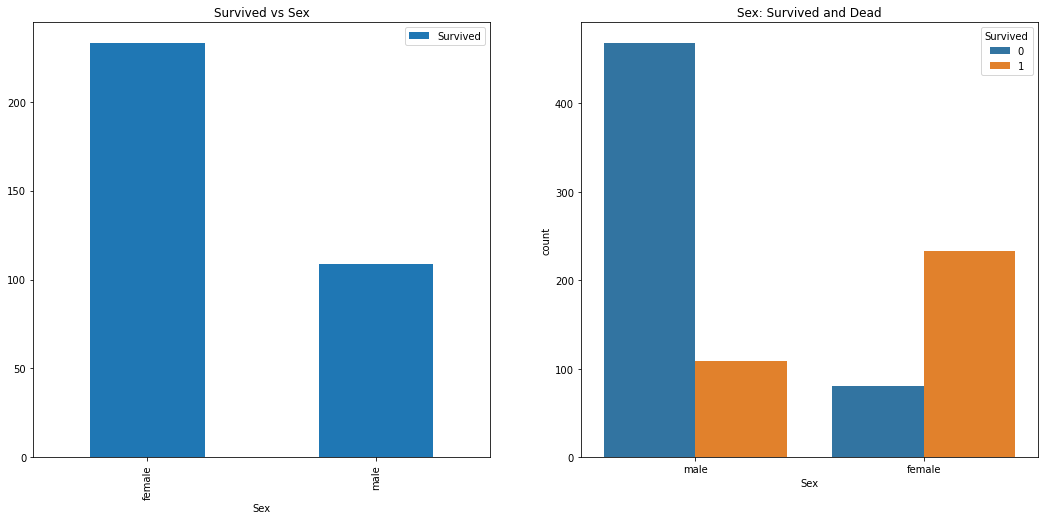

In [7]:
#代码编写
f, ax = plt.subplots(1,2,figsize = (18,8))
result[["Sex","Survived"]].groupby(["Sex"]).sum().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot("Sex", hue="Survived",data=result,ax=ax[1])
ax[1].set_title("Sex: Survived and Dead")
plt.show()

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

In [8]:
#思考题回答
result.groupby(["Sex","Survived"])["Survived"].count() #使用上一节的groupby知识进行统计

#可视化见上面，已将可视化图结合到一起
#男性的存活率比较低，女性的存活率高很多，因为妇女会得到优先救助，所以性别会影响存活率

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

Text(0.5, 1.0, 'Survived')

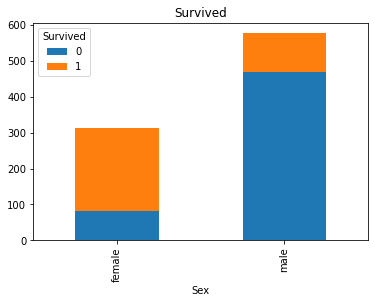

In [9]:
#代码编写
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
result.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('Survived')

【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

In [11]:
#代码编写
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
Fare = result.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
Fare
#票价越低死亡的人越多

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
13.0000  1           16
                     ..
7.7417   0            1
26.2833  1            1
7.7375   1            1
26.3875  1            1
22.5250  0            1
Name: Survived, Length: 330, dtype: int64

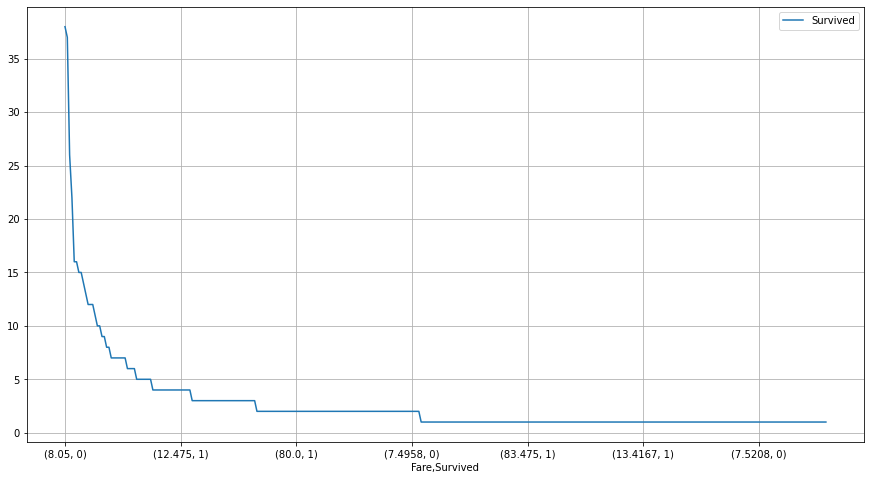

In [14]:
f = plt.figure(figsize=(15, 8))
Fare.plot(grid=True)
plt.legend()
plt.show()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

/Users/a1234/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


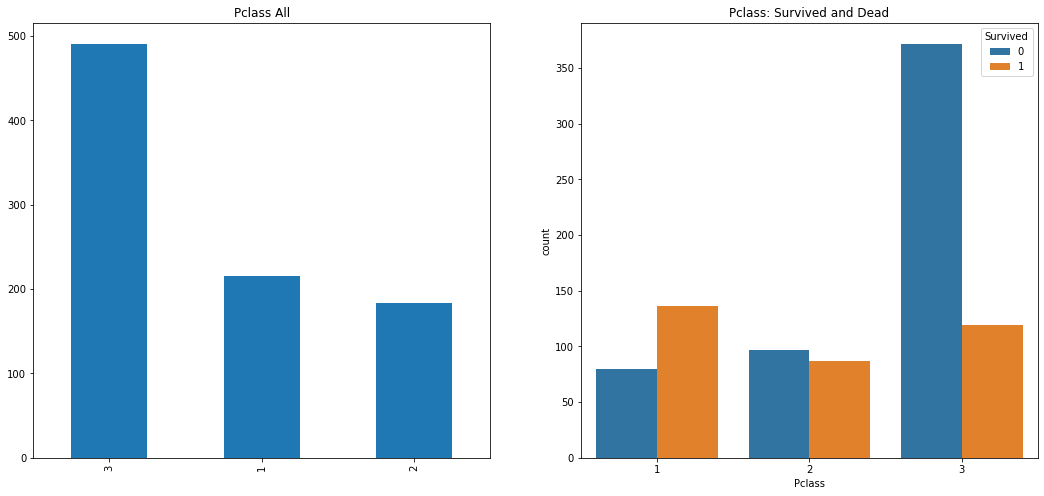

In [15]:
#代码编写
# 1表示生存，0表示死亡
f, ax = plt.subplots(1,2,figsize = (18,8))
result["Pclass"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Pclass All')
sns.countplot("Pclass", hue="Survived",data=result,ax=ax[1])
ax[1].set_title("Pclass: Survived and Dead")
plt.show()

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

In [ ]:
#思考题回答
数据可视化能够让我们对数据的发布有一个更加清晰的认识，能够清楚的对比不同数据的分布情况，了解到哪些数据可能对结果有影响。

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

/Users/a1234/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


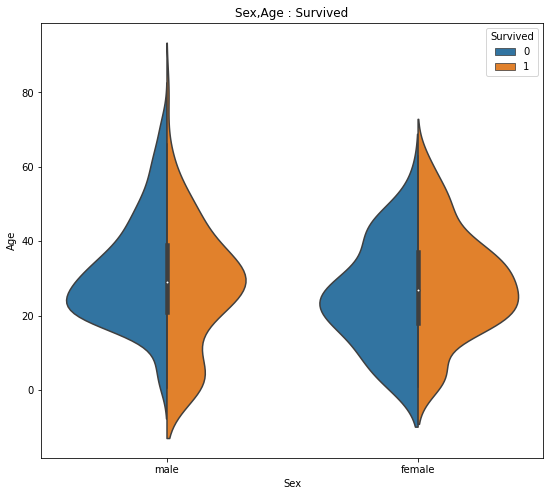

In [24]:
#代码编写
f,ax = plt.subplots(1,1,figsize=(9,8))
sns.violinplot("Sex","Age",hue="Survived",data=result,split=True,ax=ax)
ax.set_title("Sex,Age : Survived")
plt.show()

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

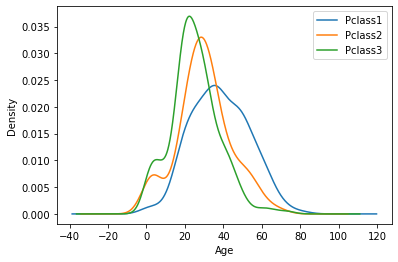

In [22]:
#代码编写
result.Age[result.Pclass == 1].plot(kind='kde')
result.Age[result.Pclass == 2].plot(kind='kde')
result.Age[result.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.legend(('Pclass1','Pclass2','Pclass3'))

【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

In [ ]:
#思考题回答
票价越高，存活的概率越大
仓位等级越高，存活的概率越大
女性的存活概率高于男性，女性优先被拯救
年龄最大与年龄较小的人被救出，中青年人死亡人数最多

【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？